In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Advanced Learning Algorithms/Week 2/optional-labs

Mounted at /content/drive
/content/drive/My Drive/Advanced Learning Algorithms/Week 2/optional-labs


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [4]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

/content/drive/MyDrive/Advanced Learning Algorithms/Week 2/optional-labs/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


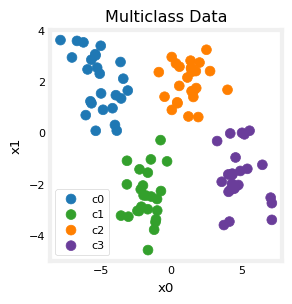

In [5]:
plt_mc(X_train,y_train,classes, centers, std=std)

In [6]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


# Model

In [8]:
tf.random.set_seed(1234)

model = Sequential(
    [
        Dense(2, activation = 'relu', name = 'L1'),
        Dense(4, activation = 'linear', name = 'L2')
    ]
)

In [11]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
)

model.fit(
    X_train, y_train,
    epochs = 200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5262
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3919 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.2896
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2044  
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1320 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0706
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0180 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9732 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9350 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9023 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8744 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8496 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8273 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8067
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7876
Epoch 16/200
4/4 

/content/drive/MyDrive/Advanced Learning Algorithms/Week 2/optional-labs/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


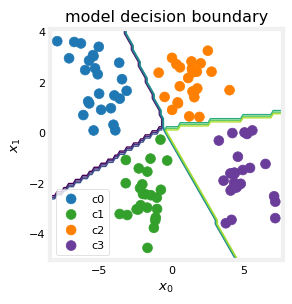

In [12]:
plt_cat_mc(X_train, y_train, model, classes)

In [13]:
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

/content/drive/MyDrive/Advanced Learning Algorithms/Week 2/optional-labs/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/content/drive/MyDrive/Advanced Learning Algorithms/Week 2/optional-labs/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


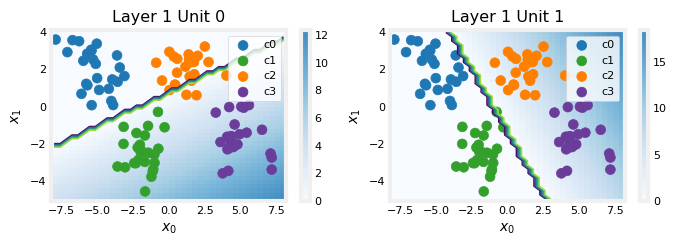

In [14]:
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

/content/drive/MyDrive/Advanced Learning Algorithms/Week 2/optional-labs/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/content/drive/MyDrive/Advanced Learning Algorithms/Week 2/optional-labs/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/content/drive/MyDrive/Advanced Learning Algorithms/Week 2/optional-labs/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/content/drive/MyDrive/Advanced Learning Algorithms/Week 2/optional-labs/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


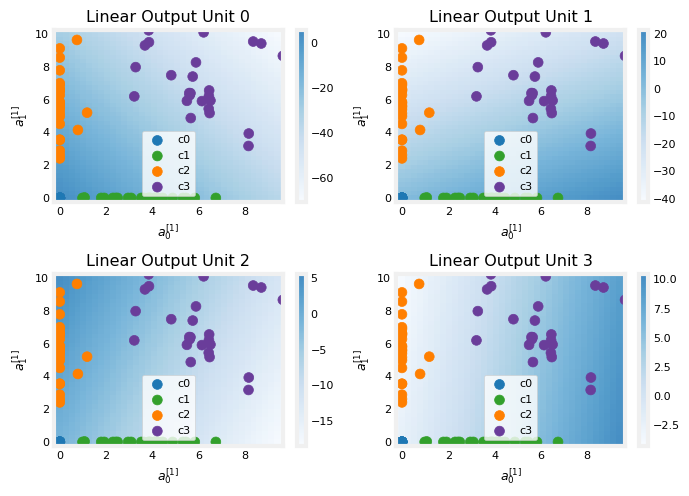

In [15]:
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))

In [22]:
output = model.predict(X_train)
output_class = np.argmax(output, axis=1)

for i in range(10):
  print(f'Sample {i+1} \n predicted probabilities: {output[i]} \n predicted class: {output_class[i]} \n actual class : {y_train[i]}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Sample 1 
 predicted probabilities: [-41.6  -10.64  -8.51   4.82] 
 predicted class: 3 
 actual class : 3
Sample 2 
 predicted probabilities: [-40.6   -7.02  -9.55   5.37] 
 predicted class: 3 
 actual class : 3
Sample 3 
 predicted probabilities: [-43.27 -10.04  -9.14   5.29] 
 predicted class: 3 
 actual class : 3
Sample 4 
 predicted probabilities: [ 3.68  0.65 -1.18 -2.27] 
 predicted class: 0 
 actual class : 0
Sample 5 
 predicted probabilities: [-36.3  -24.85  -2.11   0.7 ] 
 predicted class: 3 
 actual class : 3
Sample 6 
 predicted probabilities: [-41.12   4.5  -13.79   7.92] 
 predicted class: 3 
 actual class : 3
Sample 7 
 predicted probabilities: [-63.94 -19.59 -10.92   7.6 ] 
 predicted class: 3 
 actual class : 3
Sample 8 
 predicted probabilities: [-48.25 -20.69  -6.59   4.08] 
 predicted class: 3 
 actual class : 3
Sample 9 
 predicted probabilities: [-15.52 -22.98   2.44  -3.25] 
 predicted class: 2 
 actual class : 2
Sample 10 
 